### Preprocessing and pipelines

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

#### categorical(범주형) features 
범주형 데이터들은 숫자타입이 아니기 때문에 scikit-learn API는 받으들이지 못함    
범주형 데이터를 수치형 데이터로 변환 시켜 주어야 한다.  

dummy variable(범주형 데이터를 이진수 형태로 변환)사용  
0 값은 관측치가 해당 범주가 아님을 의미, 1 값은 해당범주를 의미

방법들  
scikit-learn : OneHotEndoder()   
pandas : get_dummies()

In [2]:
dataset = pd.read_csv('gapminder.csv' , index_col = 0)
df = dataset.copy()
df.head()

,country,year,population,continent,life_exp,gdp_cap
11,Afghanistan,2007,31889923,Asia,43.828,974.580338
23,Albania,2007,3600523,Europe,76.423,5937.029526
35,Algeria,2007,33333216,Africa,72.301,6223.367465
47,Angola,2007,12420476,Africa,42.731,4797.231267
59,Argentina,2007,40301927,Americas,75.320,12779.379640


In [3]:
# 미사용 컬럼 제거 
df.drop('country', axis = 1)

,year,population,continent,life_exp,gdp_cap
11,2007,31889923,Asia,43.828,974.580338
23,2007,3600523,Europe,76.423,5937.029526
35,2007,33333216,Africa,72.301,6223.367465
47,2007,12420476,Africa,42.731,4797.231267
59,2007,40301927,Americas,75.320,12779.379640
...,...,...,...,...,...
1655,2007,85262356,Asia,74.249,2441.576404
1667,2007,4018332,Asia,73.422,3025.349798
1679,2007,22211743,Asia,62.698,2280.769906
1691,2007,11746035,Africa,42.384,1271.211593


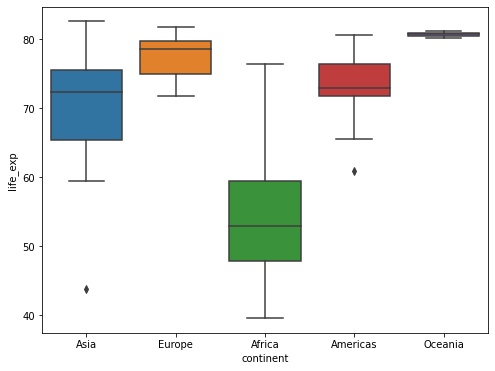

In [4]:
fig , ax = plt.subplots(figsize = (8 , 6))
sns.boxplot( df['continent'] ,df['life_exp'] )
plt.show()

In [5]:
# 범주형을 수치형으로 변환 

df_continent = pd.get_dummies(df)
df_continent.columns

Index(['year', 'population', 'life_exp', 'gdp_cap', 'country_Afghanistan',
       'country_Albania', 'country_Algeria', 'country_Angola',
       'country_Argentina', 'country_Australia',
       ...
       'country_Vietnam', 'country_West Bank and Gaza', 'country_Yemen, Rep.',
       'country_Zambia', 'country_Zimbabwe', 'continent_Africa',
       'continent_Americas', 'continent_Asia', 'continent_Europe',
       'continent_Oceania'],
      dtype='object', length=151)

In [6]:
X = df_continent.drop('life_exp' ,axis = 1)
y = df_continent.life_exp

In [7]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(normalize=True, alpha=0.5)

ridge_cv = cross_val_score(ridge, X, y, cv=5)

print(ridge_cv)

[0.48500279 0.67685318 0.48860871 0.57368816 0.5600339 ]


### Handling missing data

In [8]:
diabetes = pd.read_csv('diabetes.csv')

# Insulin 0값 ,SkinThickness 0값 , bmi 0값 은 잘못된 값 처리해주어야 한다.
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
# replace로 0값 NaN 변경 
diabetes.Insulin.replace(0 , np.nan , inplace = True)
diabetes.SkinThickness.replace(0 , np.nan , inplace = True)
diabetes.BMI.replace(0 , np.nan , inplace = True)

In [10]:
diabetes_drop = diabetes.dropna()

# 데이터의 절반이 손실되었기 때문에 잘못된 방법
diabetes_drop.shape

(393, 9)

In [11]:
diabetes.Insulin.replace(0 , np.nan , inplace = True)
diabetes.SkinThickness.replace(0 , np.nan , inplace = True)
diabetes.BMI.replace(0 , np.nan , inplace = True)

In [12]:
# 누락된 데이터를 대체 
# 항목의 평균을 지정하고 모든 결측값을 평균으로 대체

from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values= np.nan,strategy='mean')

In [13]:
X = diabetes.drop(['Outcome'] , axis = 1) 
y = diabetes.Outcome

In [14]:
imp.fit(X)
X = imp.transform(X)

In [15]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

### pipeline

In [16]:
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model  import LogisticRegression

imp = SimpleImputer(missing_values= np.nan,strategy='mean')

logreg = LogisticRegression()

# pipeline 단계목록 구성 
# 관련단계 및 estimator에 제공할 이름이 포함된 튜플 

steps = [('imputation', imp),
          ('logistic_regression', logreg)  ]

Pipeline = Pipeline(steps)


X_train , X_test , y_train , y_test  = train_test_split(X, y, test_size = 0.4 ,random_state = 42) 

In [17]:
Pipeline.fit(X_train , y_train)

Pipeline(steps=[('imputation', SimpleImputer()),
                ('logistic_regression', LogisticRegression())])

In [18]:
y_pred = Pipeline.predict(X_test)

In [19]:
Pipeline.score(X_test, y_test)

0.7694805194805194

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       206
           1       0.65      0.66      0.65       102

    accuracy                           0.77       308
   macro avg       0.74      0.74      0.74       308
weighted avg       0.77      0.77      0.77       308



### Centering and scaling 

In [23]:
wine = pd.read_csv('winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Why scale data?   
머신러닝 학습에서 다른 features에 비해 특정 feature가 더 큰 규모의 range를 갖고 있을 경우 모델에 부당하게 영향을 미칠 수 있다. **정규화, 스케일링 및 센터링이라는 작업을 수행**

데이터를 정규화 하는 방법들  
Standardization - Subtract the mean and divide by variance   
All features are centered around zero and have variance one  
can also subtract the minimum and devide by the range  

**정규화된 데이터는 최소 0과 최대 1의 값을 갖는다 , 정규화를 통해 -1 ~ 1 값을 갖도록 만드는것도 가능**

In [24]:
from sklearn.preprocessing import scale
X_scaled = scale(X)

In [25]:
np.mean(X) , np.std(X)

(55.589615052259234, 62.024435272693644)

In [26]:
np.mean(X_scaled) , np.std(X_scaled)

(1.491862189340054e-16, 1.0)

In [27]:
X = wine.drop('quality' , axis = 1)
y = wine.quality

In [38]:
# Scaling in a pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


steps = [('scaler', StandardScaler()),
         ('knn' , KNeighborsClassifier())]

pipeline = Pipeline(steps)

X_train , X_test , y_train , y_test  = train_test_split(X, y, test_size = 0.2 ,random_state = 21) 

knn_scaled = pipeline.fit(X_train , y_train)
y_pred = pipeline.predict(X_test)

accuracy_score(y_test , y_pred)

0.615625

In [40]:
# scaling 한 모델의 정확성이 더 높다 0.615625 > 0.49375 

knn_unscaled = KNeighborsClassifier()
knn_unscaled.fit(X_train, y_train)
knn_unscaled.score(X_test ,y_test)

0.49375

In [48]:
# CV and Scaling in a pipeline 

from sklearn.model_selection import GridSearchCV

steps = [('scaler', StandardScaler()),
         ('knn' , KNeighborsClassifier())]

pipeline = Pipeline(steps)
param_grid ={'knn__n_neighbors' :np.arange(1,50)} # knn에서 n개의 이웃만 튜닝

X_train , X_test , y_train , y_test  = train_test_split(X, y, test_size = .2,
                                                       random_state = 21)

cv = GridSearchCV(pipeline, param_grid )
cv.fit(X_train , y_train)

y_pred = cv.predict(X_test)

In [50]:
print(cv.best_params_)

{'knn__n_neighbors': 1}


In [51]:
print(cv.score(X_test , y_test))

0.634375


In [52]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.18      0.12      0.15        16
           5       0.66      0.72      0.69       127
           6       0.68      0.60      0.64       131
           7       0.63      0.69      0.66        42
           8       0.25      0.33      0.29         3

    accuracy                           0.63       320
   macro avg       0.40      0.41      0.40       320
weighted avg       0.63      0.63      0.63       320

